## Introduction 

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website, so as to answer the following question:*If someone wants to buy a second hand car in ebay, which brand would be better?*
<br>
<br>
The dataset was originally scraped and uploaded to Kaggle. Because of the file size, we sampled 50,000 data points and aims to provide a overview analysis. 
<br>The datafield are as follows:

- dateCrawled : when this ad was first crawled, all field-values are taken from this date
- name : "name" of the car
- seller : private or dealer
- offerType
- price : the price on the ad to sell the car
- abtest
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- dateCreated : the date for which the ad at ebay was created
- nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
- postalCode
- lastSeenOnline : when the crawler saw this ad last online

###  1. Import the relevant libraries and data 

In [1]:
# Import the libraries 
import numpy as np 
import pandas as pd 
from csv import reader 

# Read the file 
autos = pd.read_csv('autos.csv',  encoding='latin_1')
print(autos.head(5))

       dateCrawled                                               name  seller  \
0  3/26/2016 17:47                   Peugeot_807_160_NAVTECH_ON_BOARD  privat   
1   4/4/2016 13:38         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik  privat   
2  3/26/2016 18:57                         Volkswagen_Golf_1.6_United  privat   
3  3/12/2016 16:58  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...  privat   
4   4/1/2016 14:38  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...  privat   

  offerType    price   abtest vehicleType  yearOfRegistration    gearbox  \
0   Angebot  $5,000   control         bus                2004    manuell   
1   Angebot  $8,500   control   limousine                1997  automatik   
2   Angebot  $8,990      test   limousine                2009    manuell   
3   Angebot  $4,350   control  kleinwagen                2007  automatik   
4   Angebot  $1,350      test       kombi                2003    manuell   

   powerPS   model   odometer  monthOfRegistration fuelT

### 2.Preliminary check of data 

After successfully importing the data, there are something that we need to check: 
- Rows and columns in the dataset 
- Variable types of each columns 
- Any NULL values included
- Overview information for each columns

First we can check the rows and columns in the dataset

In [2]:
print(autos.shape)

(50000, 20)


Then the variable types

In [3]:
print(autos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

And to see if any NULL values included:

In [4]:
print(autos.isnull().sum(axis=0))

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64


Finally the overview information for each columns:

In [5]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,12073,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,10432
top,3/28/2016 14:49,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,4/3/2016 0:00,NaN,NaN,4/6/2016 2:45
freq,15,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,112
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


From the data above, we can see the followings: 
- The column nrOfPictures does not contain any values 
- There are only 2 unique sellers and offerType, which we need to investigate further 
- Columns Price and Odometer are not in int format.
- Column Price and yearOfRegistration contains strange min and max value
- Date related columns i.e date_crawled, last_seen, and ad_created are regarded as strings

### 3.Data cleaning

We will clean the data with the following approach:
<br>
<br>
First, the column 'nrOfPictures' does not contain values and it is not a key information. At the same time we do not have any additional information for it. Therefore we will drop this column
<br>
<br>
For the columns sellers and offertype, the data is as follow: 

In [6]:
print(autos['seller'].value_counts())
print(autos['offerType'].value_counts())

privat        49999
gewerblich        1
Name: seller, dtype: int64
Angebot    49999
Gesuch         1
Name: offerType, dtype: int64


Based on the result above, we can see that most of the values in the columns seller and offer type are in the same value, so we can assume that all sales are from private and offertype is Angebot. 
<br>
<br> With the information above, we can drop the 3 columns mentioned:

In [7]:
autos = autos.drop(["nrOfPictures", "seller", "offerType"], axis=1)
print(autos.head())

       dateCrawled                                               name  \
0  3/26/2016 17:47                   Peugeot_807_160_NAVTECH_ON_BOARD   
1   4/4/2016 13:38         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  3/26/2016 18:57                         Volkswagen_Golf_1.6_United   
3  3/12/2016 16:58  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4   4/1/2016 14:38  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

     price   abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
0  $5,000   control         bus                2004    manuell      158   
1  $8,500   control   limousine                1997  automatik      286   
2  $8,990      test   limousine                2009    manuell      102   
3  $4,350   control  kleinwagen                2007  automatik       71   
4  $1,350      test       kombi                2003    manuell        0   

    model   odometer  monthOfRegistration fuelType       brand  \
0  andere  150,000km                    3   

The next issue is the variable tyoe for variable price and odometer. As we see from the autos.info(), the variable is not int64. This may cause problems in the further calculation and we need to find out why.

In [8]:
autos['price'].value_counts()

$0          1421
$500         781
$1,500       734
$2,500       643
$1,000       639
            ... 
$29,989        1
$75,900        1
$34,940        1
$61,900        1
$6,495         1
Name: price, Length: 2357, dtype: int64

In [9]:
autos["odometer"].value_counts()

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

The reason is, there are some other elements such as price tag, commar, or the measure that convert the int to string. 
<br>For that we can define a function to clean the data: 

In [10]:
def data_clean(ele): 
    ele = ele.replace("$","")
    ele = ele.replace(",","")
    ele = ele.replace("km", "")
    return int(ele)

autos["price"] = autos["price"].apply(data_clean) 
autos["odometer"] = autos["odometer"].apply(data_clean) 

In [11]:
print(autos["price"].value_counts())

0        1421
500       781
1500      734
2500      643
1000      639
         ... 
20790       1
8970        1
846         1
2895        1
33980       1
Name: price, Length: 2357, dtype: int64


In [12]:
print(autos["odometer"].value_counts())

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer, dtype: int64


Now the price and odometer columns are in the corrent format.
<br>
<br>
The next step is to investigate the strange value in the price column. According to the inforation frm description table, the min value is 0 and the max value is higher than 1 million. 
<br>In this case, we need to know how many of the records contain the extreme values:  

In [13]:
print(autos["price"].value_counts().sort_index(ascending=False).head(20))
print(autos["price"].value_counts().sort_index(ascending=True).head(20))

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64


From the value, we can see that there are 1421 records with 0 values and 1 record with 99999999, which does not make sense. 
<br>
<br>Furthermore, there are also some records with price i.e records > 350000. However, since ebayKleineAnzeigen is a auction website, it is legitimate to have transactions with 1 EUR. 
<br>
<br>
Therefore we can keep those record with the price between 1 - 350000

In [14]:
autos = autos[autos['price'].between(1,351000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

Regarding to the date issue, the date_crawled, last_seen, and ad_created columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively. 
<br>
<br>
Let's first understand how the values in the three string columns are formatted.

In [15]:
autos[['dateCrawled','dateCreated','lastSeen']][0:5]

,dateCrawled,dateCreated,lastSeen
0,3/26/2016 17:47,3/26/2016 0:00,4/6/2016 6:45
1,4/4/2016 13:38,4/4/2016 0:00,4/6/2016 14:45
2,3/26/2016 18:57,3/26/2016 0:00,4/6/2016 20:15
3,3/12/2016 16:58,3/12/2016 0:00,3/15/2016 3:16
4,4/1/2016 14:38,4/1/2016 0:00,4/1/2016 14:38


To understand the date range, we can extract just the date values, and the date value for all 3 columns are the first 10 characters. Therefore we can extract them with a function:

In [16]:
autos['dateCrawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

3/10/2016     0.032184
3/11/2016     0.032575
3/12/2016     0.036920
3/13/2016     0.015670
3/14/2016     0.036549
                ...   
4/7/2016 4    0.000021
4/7/2016 6    0.000021
4/7/2016 7    0.000082
4/7/2016 8    0.000082
4/7/2016 9    0.000082
Name: dateCrawled, Length: 131, dtype: float64

In [17]:
autos["dateCreated"].str[:10].value_counts(normalize=True, dropna=False).sort_values()

2/16/2016     0.000021
2/17/2016     0.000021
2/11/2016     0.000021
2/9/2016 0    0.000021
1/29/2016     0.000021
                ...   
3/12/2016     0.036755
4/4/2016 0    0.036858
3/21/2016     0.037579
3/20/2016     0.037949
4/3/2016 0    0.038855
Name: dateCreated, Length: 76, dtype: float64

In [18]:
autos["lastSeen"].str[:10].value_counts(normalize=True, dropna=False).sort_values()

3/6/2016 6    0.000021
3/6/2016 5    0.000041
3/8/2016 0    0.000041
3/7/2016 5    0.000041
3/9/2016 3    0.000062
                ...   
4/5/2016 2    0.037496
4/6/2016 2    0.046700
4/7/2016 1    0.047483
4/5/2016 1    0.080325
4/6/2016 1    0.099949
Name: lastSeen, Length: 130, dtype: float64

The last data issue is the year of registration. First, the year of registration should not be later than 2016 since the data is crawled in 2016. Second, it should be at least after 1900 since cars are invented after 1900. 
<br>
<br>
With the assumption above, we can see the trends are as follows: 

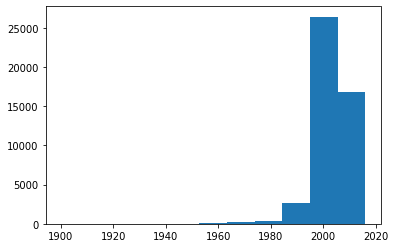

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(autos["yearOfRegistration"], range=(1900,2016), bins=11)
plt.show();

We can see that there are only a few records for cars which were registered before 1990, so we can exclude those. 
The data shd be as follows: 

In [21]:
autos = autos[autos["yearOfRegistration"].between(1900,2016)]
autos["yearOfRegistration"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: yearOfRegistration, dtype: float64

Now we have cleaned up the dataset. To make the column names easier to read, we can switch the columns from camel case to snake case. 
<br>
<br>
For some columns, we need to rename them and we can apply the function to the remaining columns: 

In [22]:
def change_case(x):
    return ''.join('_' + char.lower() if char.isupper() else char for char in x).lstrip('_')

autos.rename(columns={'yearOfRegistration':'registration_year'}, inplace=True)
autos.rename(columns={'monthOfRegistration':'registration_month'}, inplace=True)
autos.rename(columns={'notRepairedDamange':'unrepaired_damage'}, inplace=True)
autos.rename(columns={'dateCreated':'ad_created'}, inplace=True)
autos.rename(columns={'powerPS': 'power_ps'}, inplace=True)

for x in autos.columns: 
    autos.rename(columns={x: change_case(x)}, inplace=True)

print(autos.columns) 

Index(['date_crawled', 'name', 'price', 'abtest', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer',
       'registration_month', 'fuel_type', 'brand', 'not_repaired_damage',
       'ad_created', 'postal_code', 'last_seen'],
      dtype='object')


### 4.Analysis

As mentioned before, this analysis aims to answer the following question: *If someone wants to buy a second hand car in ebay, which brand would be better?*

To start the anaylsis, we first have to know: 
- What are the favourite brands in the market?
- Whats is the average price of the cars under those brands?

### The favourite brands

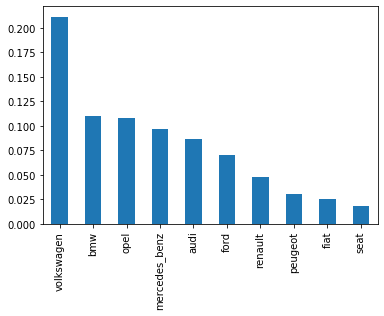

In [24]:
fav_brands = autos["brand"].value_counts(normalize=True).head(10)
data.plot(kind='bar')

From the chart, we can see that the cars from german manufacturers are the favourite brands, follows by ford and some other european brands.
<br> We will choose these brands and further analzye their products

### The average price of those brands 

In [33]:
brand_mean_prices = {}
selected_brands = data.index

# First use a dict to save to data 
for brand in selected_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

# Then convert the dict into dataframe and rank     
df_price = pd.DataFrame(list(brand_mean_prices.items()), columns = ['brand', 'avg_price'])
df_price.sort_values('avg_price',inplace=True, ascending=False)
df_price.style.hide_index()    

brand,avg_price
audi,9336
mercedes_benz,8628
bmw,8332
volkswagen,5402
seat,4397
ford,3749
peugeot,3094
opel,2975
fiat,2813
renault,2474


There is no surprise that cars from Audi, MB and BMW have a significantly higher price then the others.
<br>
<br>
However, not all the customers aim to buy a luxury brand cars. To make a better recommendation, we can divide the brands into different segments, based on the average selling price.
- For brands which have a average price > 8000, it is regarded as luxury brands
- For brands which have a average price between 3000 and 7999, it is regarded as normal-price brands
- For brands which have a average price lower than 3000, it is regarded as low-price brands

In [40]:
def classification(ele): 
    if ele > 8000:
        return 'luxury_brands'
    elif ele <= 2999: 
        return 'low_price_brands'
    elif (ele >= 3000 & ele <= 7999):
        return 'normal brands'
   
df_price['category'] = df_price['avg_price'].apply(classification)
df_price.style.hide_index()

brand,avg_price,category
audi,9336,luxury_brands
mercedes_benz,8628,luxury_brands
bmw,8332,luxury_brands
volkswagen,5402,normal brands
seat,4397,normal brands
ford,3749,normal brands
peugeot,3094,normal brands
opel,2975,low_price_brands
fiat,2813,low_price_brands
renault,2474,low_price_brands


### The average mileage of those brands 

Besides price, mileage is also an important factor that potential used-cars buyers should consider. The higher the mileage, the larger opportunity that the car wears out. 
<br>
<br>
We can use the same technique above in analysing the average mileage:

In [34]:
brand_mean_mileage = {}

for brand in data.index:
    brand_only = autos[autos["brand"] == brand]
    mean_mileage = brand_only["odometer"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

brand_mean_mileage 
    
    
df_mileage = pd.DataFrame(list(brand_mean_mileage.items()), columns = ['brand', 'avg_mileage'])
df_mileage.sort_values('avg_mileage',inplace=True, ascending=False)
df_mileage.style.hide_index()

brand,avg_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
renault,128071
peugeot,127153
ford,124266
seat,121131
fiat,117121


From the data above, we can see that Fiat has significantly lower average mileages. But except Fiats, the difference between the other brands is within or at most 10%. 

### Percentage of cars with non-repairing damages

This figure is a important metrics, because it reflects how are the cars maintained and the possibilities of extra expense in repairing and maintenance. 

In [37]:
brands = autos[autos['brand'].isin(selected_brands)]
unrepair_damage_brands = brands.groupby(['brand','not_repaired_damage'])['not_repaired_damage'].count().reset_index(name='count')
unrepair_damage_brands['unrepair_pct'] = unrepair_damage_brands['count'].div(unrepair_damage_brands.groupby('brand')['count'].transform('sum'))
unrepair_damage_brands_prob = unrepair_damage_brands[unrepair_damage_brands['not_repaired_damage'] == 'ja'][['brand', 'unrepair_pct']]
unrepair_damage_brands_prob.style.hide_index()

brand,unrepair_pct
audi,0.0980277
bmw,0.0926224
fiat,0.146394
ford,0.159047
mercedes_benz,0.0900735
opel,0.148381
peugeot,0.160377
renault,0.162069
seat,0.120112
volkswagen,0.107193


### Merge all data

Now we can summarize the figure above:

In [41]:
total_df = pd.merge(df_price,df_mileage, how='left', on='brand')
total_df = pd.merge(total_df, unrepair_damage_brands_prob, how='left', on='brand')

total_df = total_df[['category','brand', 'avg_price', 'avg_mileage', 'unrepair_pct']]
total_df.style.hide_index()

category,brand,avg_price,avg_mileage,unrepair_pct
luxury_brands,audi,9336,129157,0.0980277
luxury_brands,mercedes_benz,8628,130788,0.0900735
luxury_brands,bmw,8332,132572,0.0926224
normal brands,volkswagen,5402,128707,0.107193
normal brands,seat,4397,121131,0.120112
normal brands,ford,3749,124266,0.159047
normal brands,peugeot,3094,127153,0.160377
low_price_brands,opel,2975,129310,0.148381
low_price_brands,fiat,2813,117121,0.146394
low_price_brands,renault,2474,128071,0.162069


### 5.Insights 

From the data, we can see the followings: 
- Among the luxury brands, Audi has the highest average price and the lowest average price, which make sense because these 2 factors should have negative relationship. However, the percentage of non-repair damage for Audi is also significantly higher than the other luxury 2 brands, wich can be caused of differnt reasons e.g expensive in maintenance.  
<br>
<br>
- For normal brands, We can see that the price varied but the avg_mileage are similar. Volkswagen has the highest price but at the same time the lowest percentage of unrepaired damage. One of the possible reasons is, they have better support than the other manufacturers in Germany. 
<br>
<br>
- For low_price_brands, Opel and Fiat are similar in both price and percentage of non-repaired damages, however Opel has significantly higher mileage than Fiat. Meanwhile Renault has a significantly lower price but a higher percentage of non-repaired damange. 

### 6.Conclusion

The information above provides only a preliminary analysis in selecting car brands. To further analysis, we need also other information such as the detail information of damages, the accident history, repairment and maintenance fee information etc.

With those information we can apply advanced models to predict the total cost of ownership. Meanwhile it is also possible to compare not only by brands, but also compare by models among different brands.